In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Qwen 3B"

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_qwen_3b.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_qwen2": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9      2371
1      1928
2      1728
3      1691
5      1331
4      1276
7       672
8       599
6       428
NaN       8
Name: count, dtype: int64

In [3]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_qwen2")
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    2371
1    1928
2    1728
3    1691
5    1331
4    1276
7     672
8     599
6     428
Name: count, dtype: int64

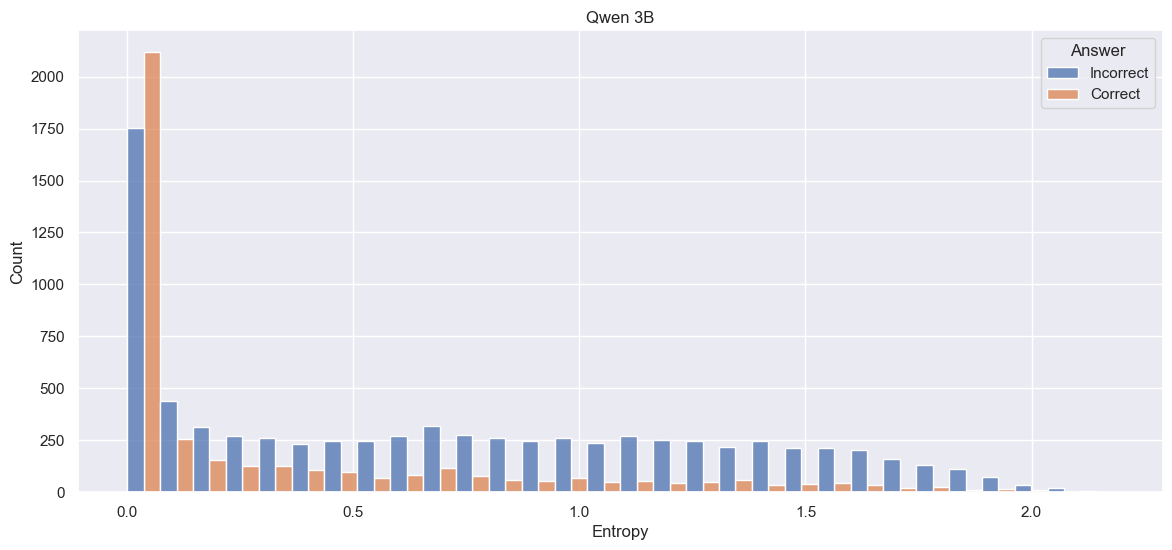

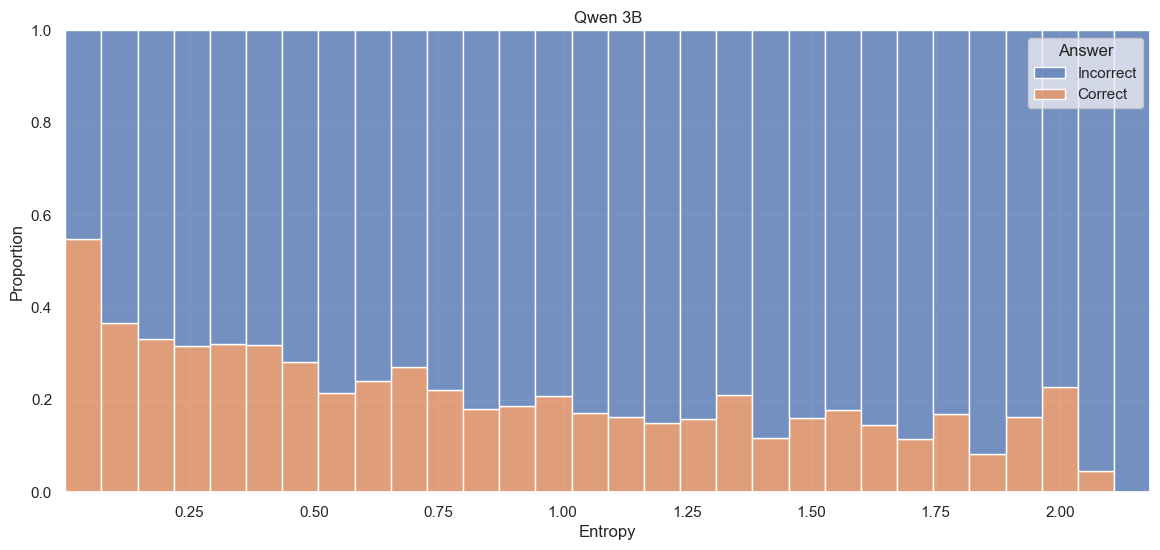

In [4]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name=model_title)

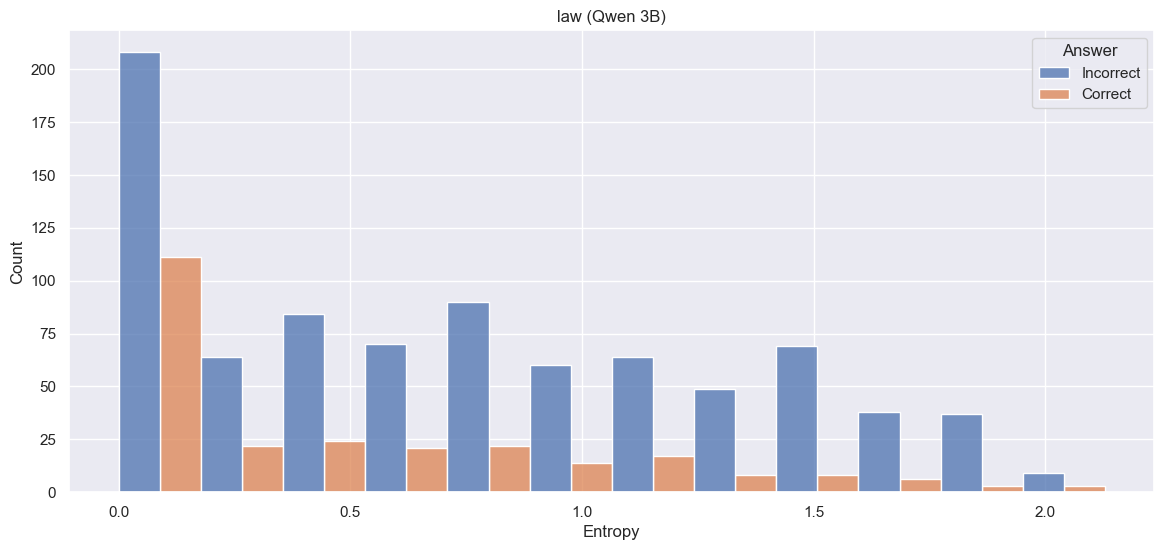

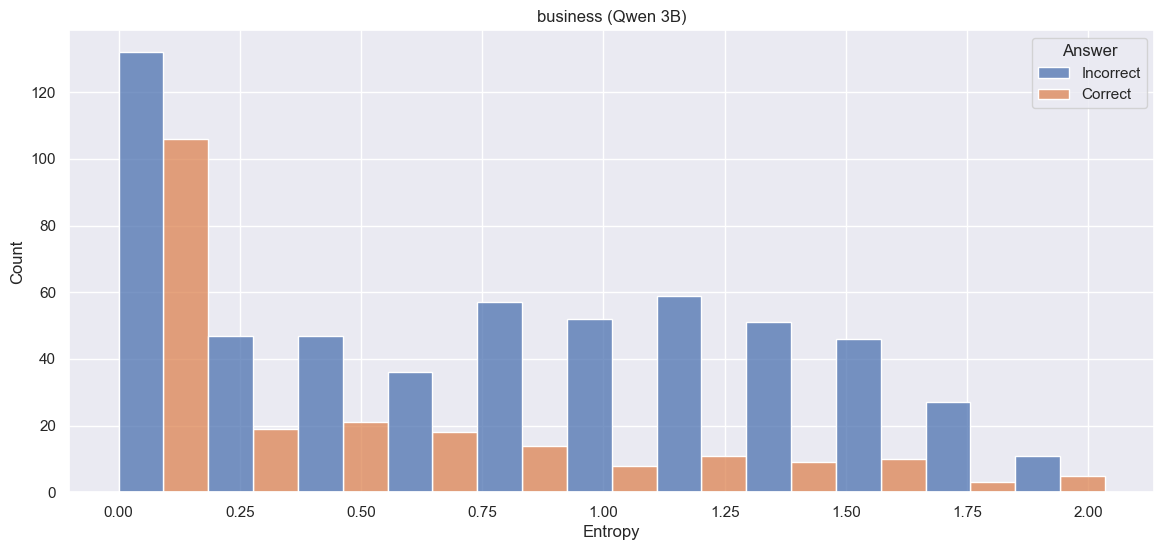

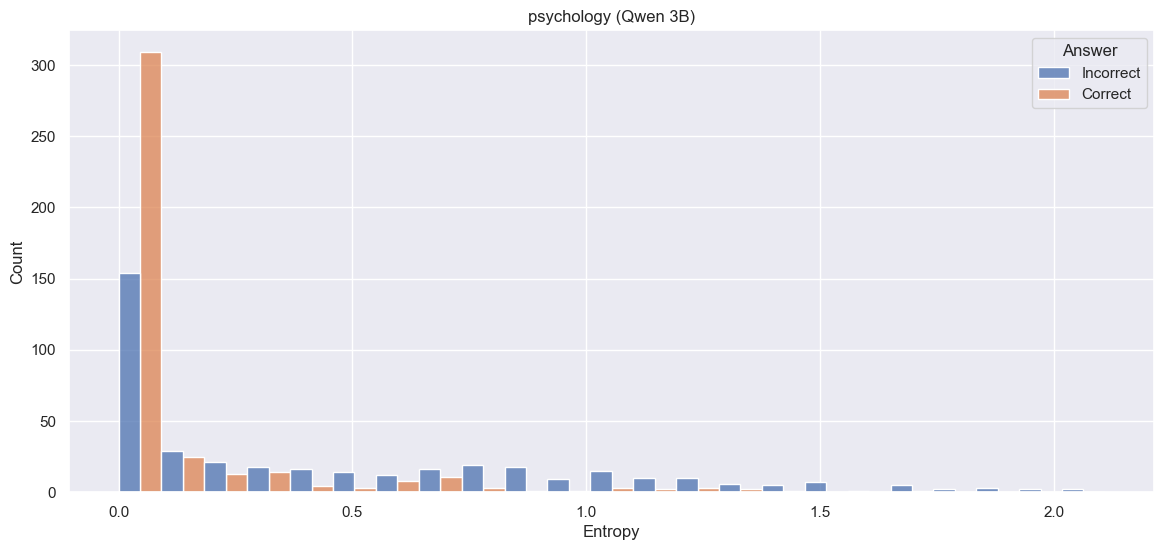

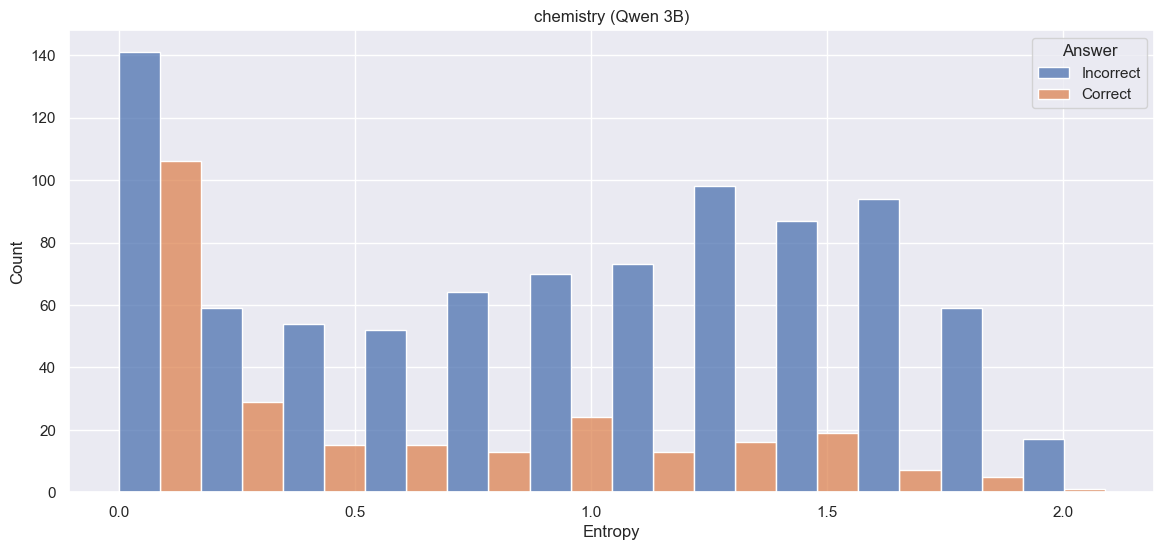

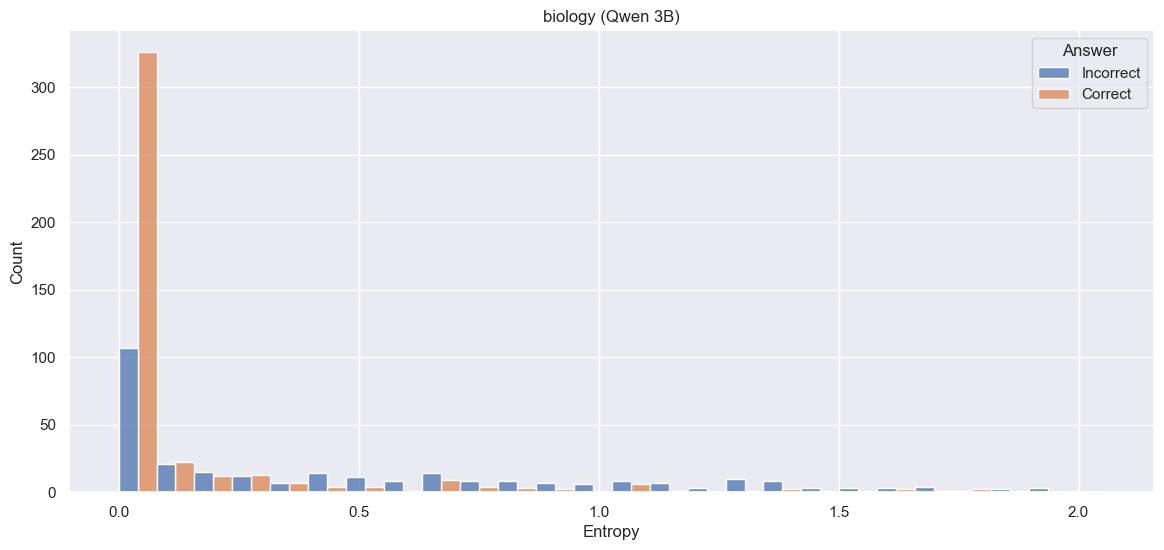

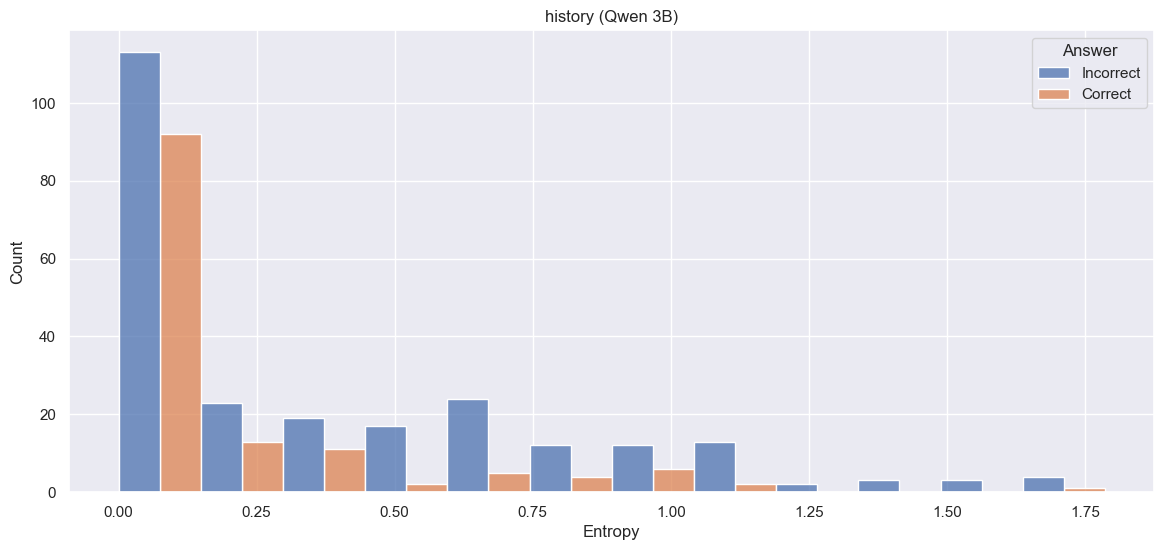

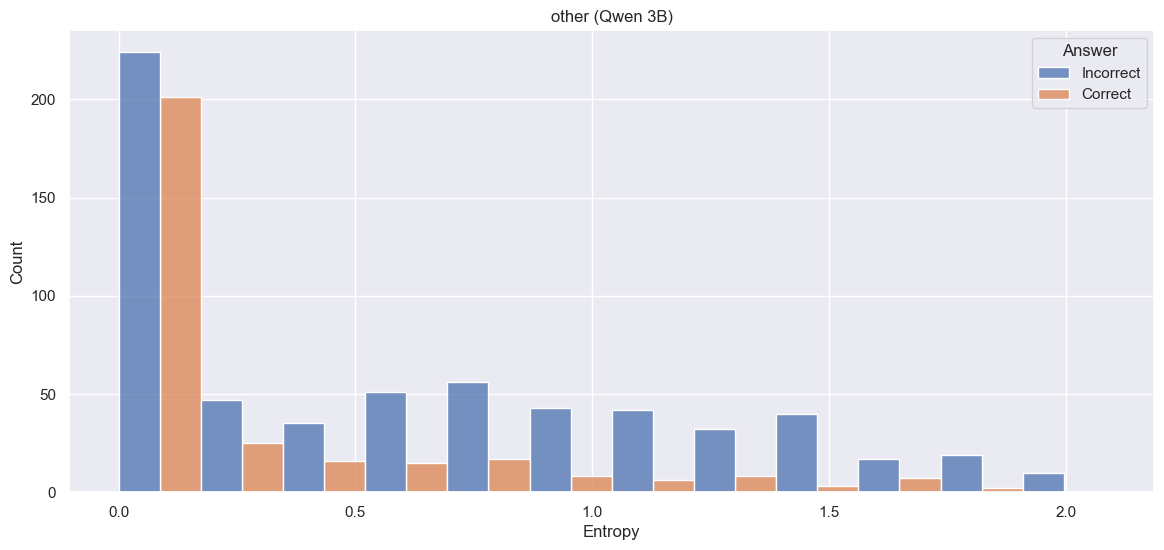

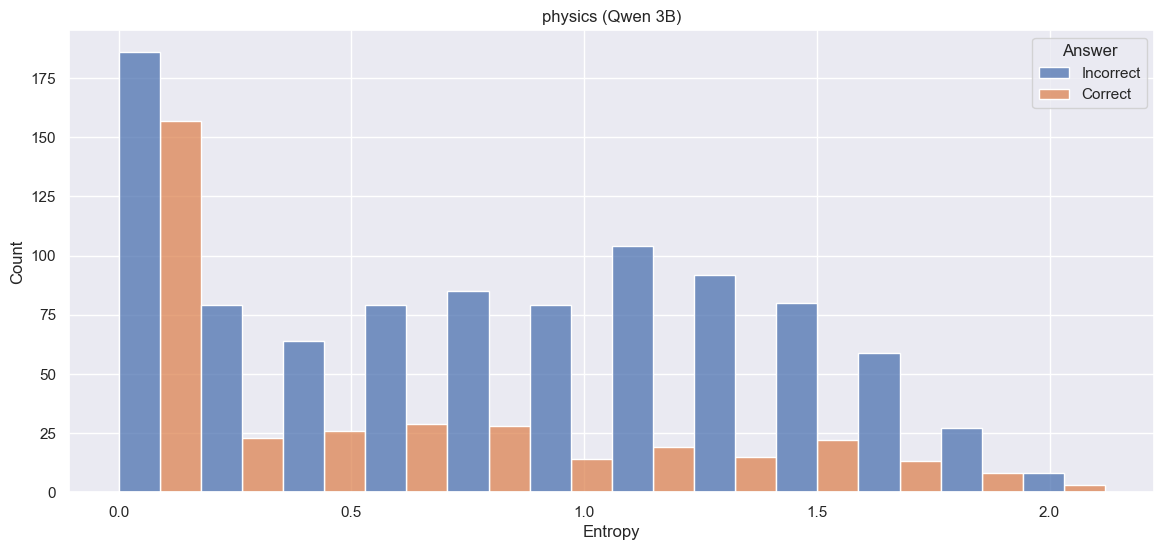

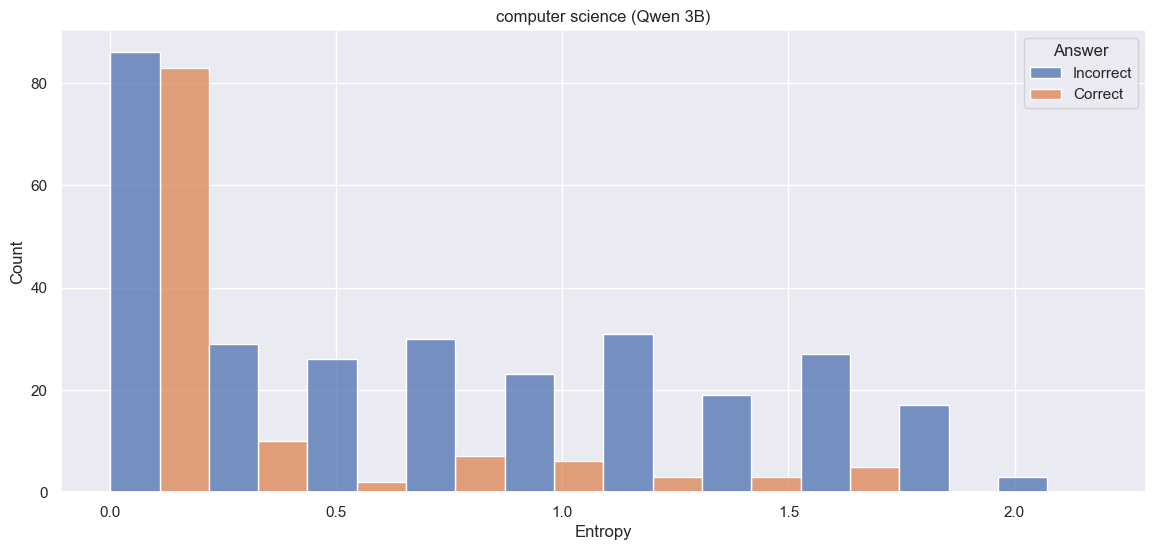

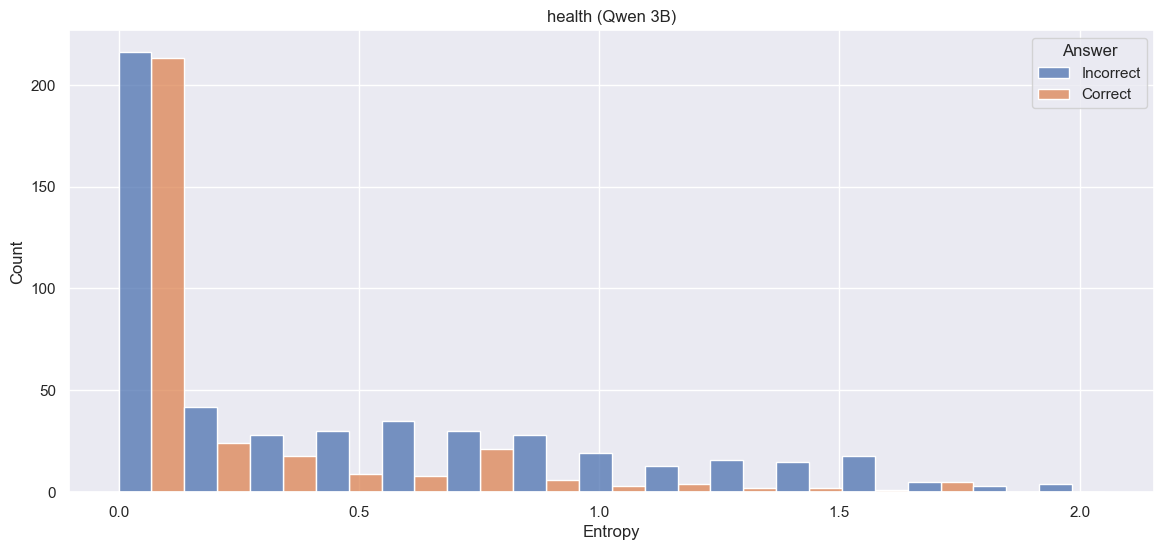

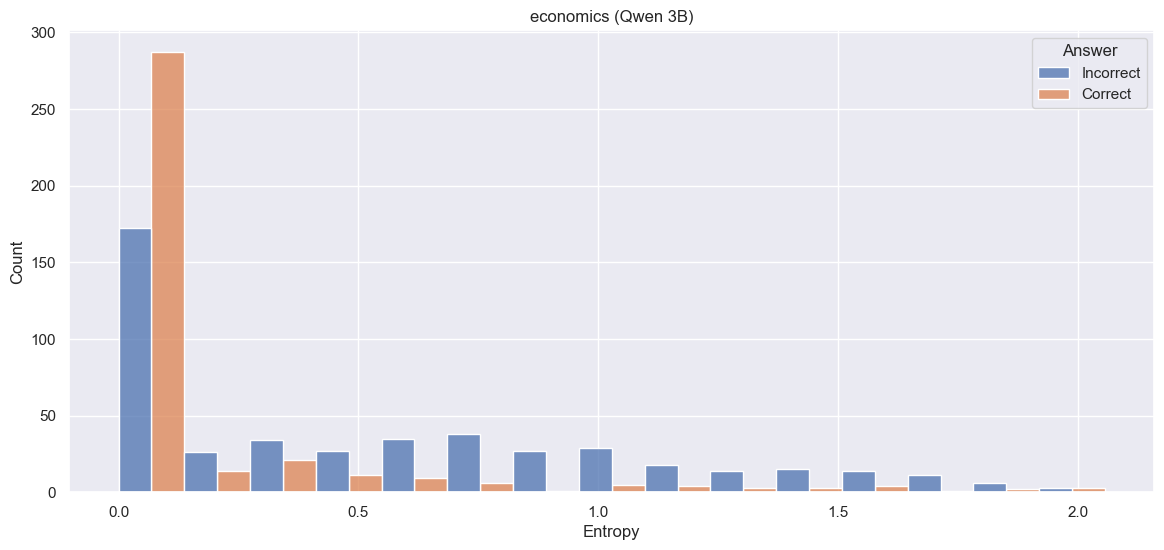

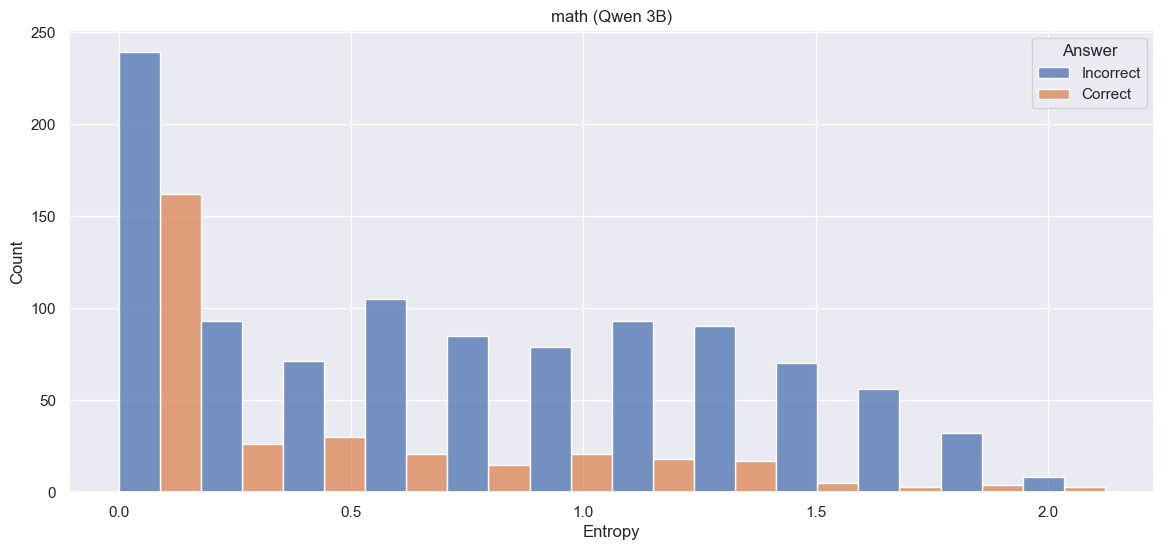

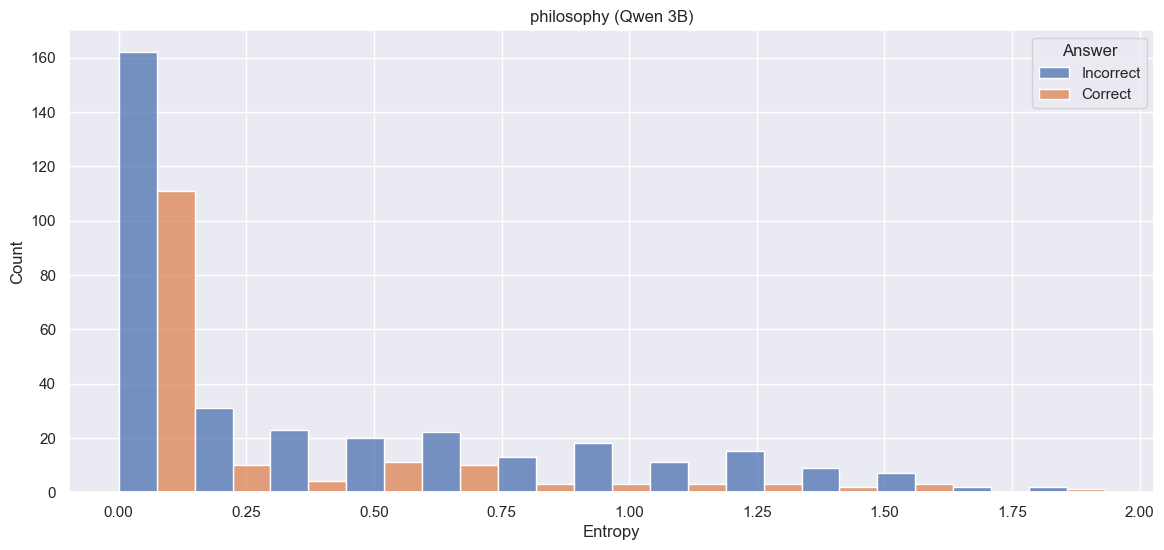

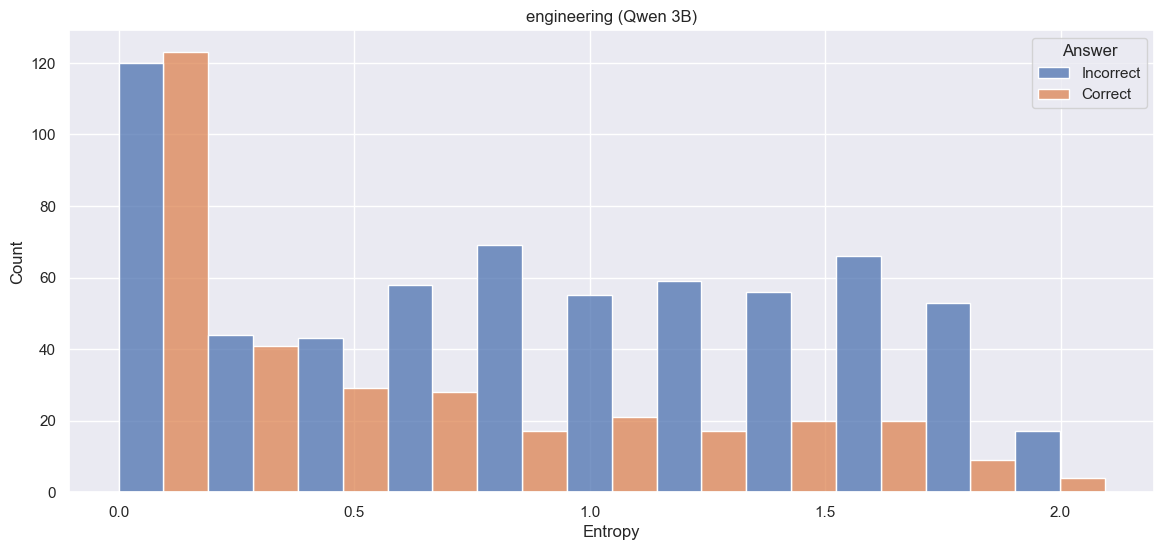

In [5]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df, "category", "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name=model_title
)

In [6]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df,
    category_col="category",
    model_answer_correct_col="entropy_ans_correct_qwen2",
    score_col="entropy_value_qwen2",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.718369,0.436738,12024,0.332668,Qwen 3B,entropy_value_qwen2
1,law,0.633099,0.266198,1101,0.235241,Qwen 3B,entropy_value_qwen2
2,business,0.669422,0.338843,789,0.283904,Qwen 3B,entropy_value_qwen2
3,psychology,0.767283,0.534566,798,0.506266,Qwen 3B,entropy_value_qwen2
4,chemistry,0.691345,0.382690,1131,0.232538,Qwen 3B,entropy_value_qwen2
5,biology,0.792976,0.585953,716,0.589385,Qwen 3B,entropy_value_qwen2
6,history,0.664076,0.328151,381,0.356955,Qwen 3B,entropy_value_qwen2
7,other,0.699206,0.398412,924,0.333333,Qwen 3B,entropy_value_qwen2
8,physics,0.649015,0.298031,1299,0.274827,Qwen 3B,entropy_value_qwen2
9,computer science,0.759046,0.518092,410,0.290244,Qwen 3B,entropy_value_qwen2


In [7]:
from reasoning_fine_tune.analysis.join_with_masj_education_levels import join_with_masj_education_levels

mmlu_entropy_df_with_masj_edu_levels = join_with_masj_education_levels(mmlu_entropy_df)

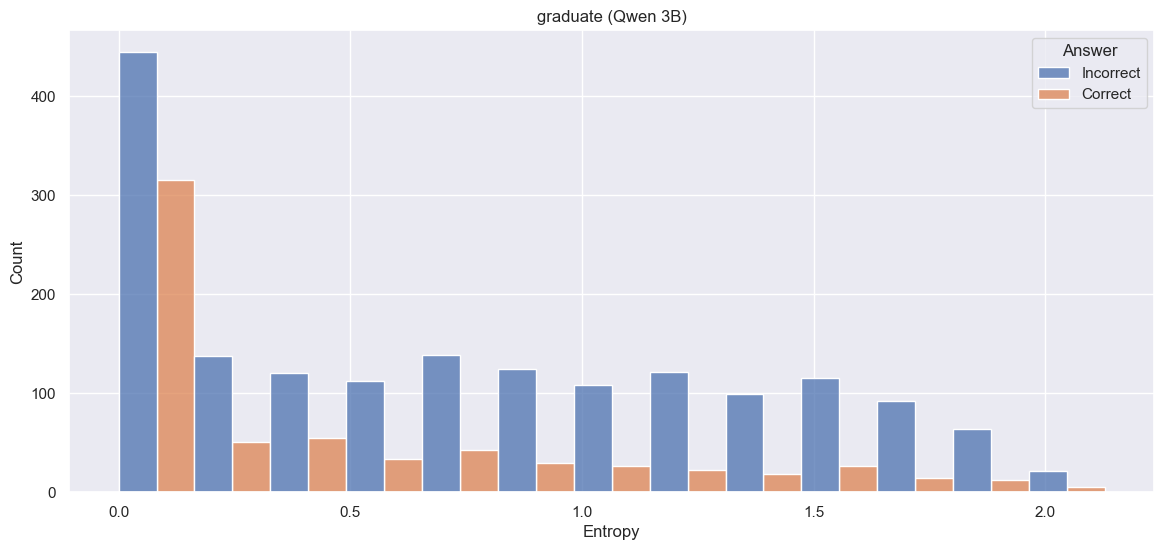

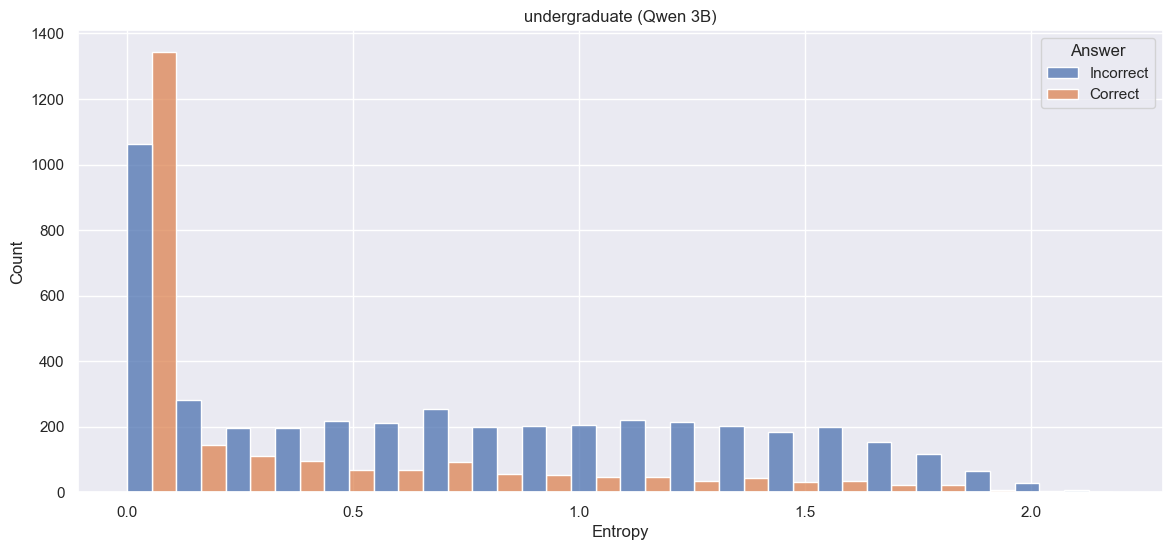

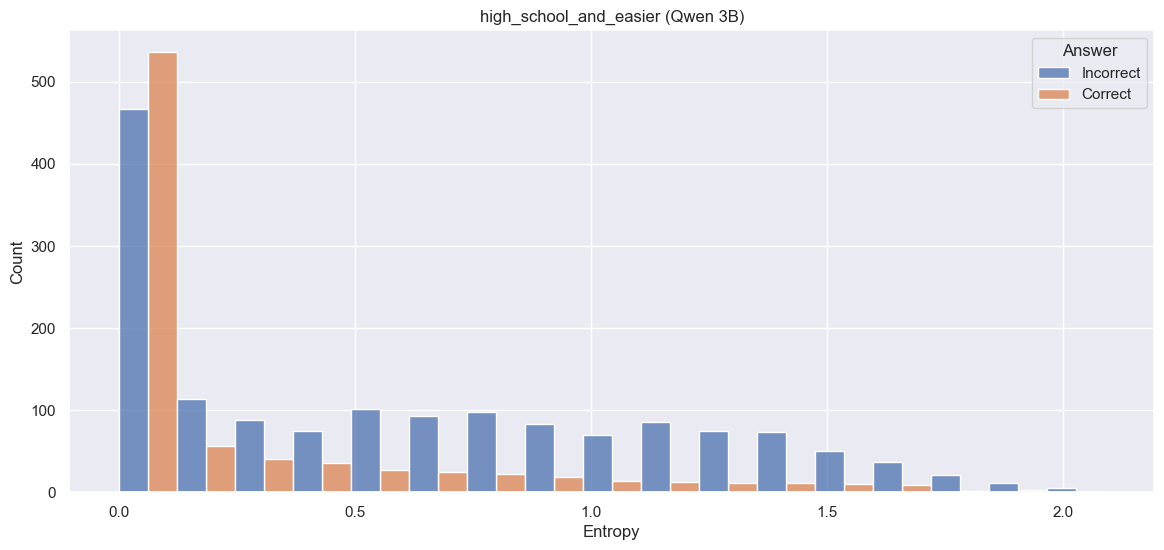

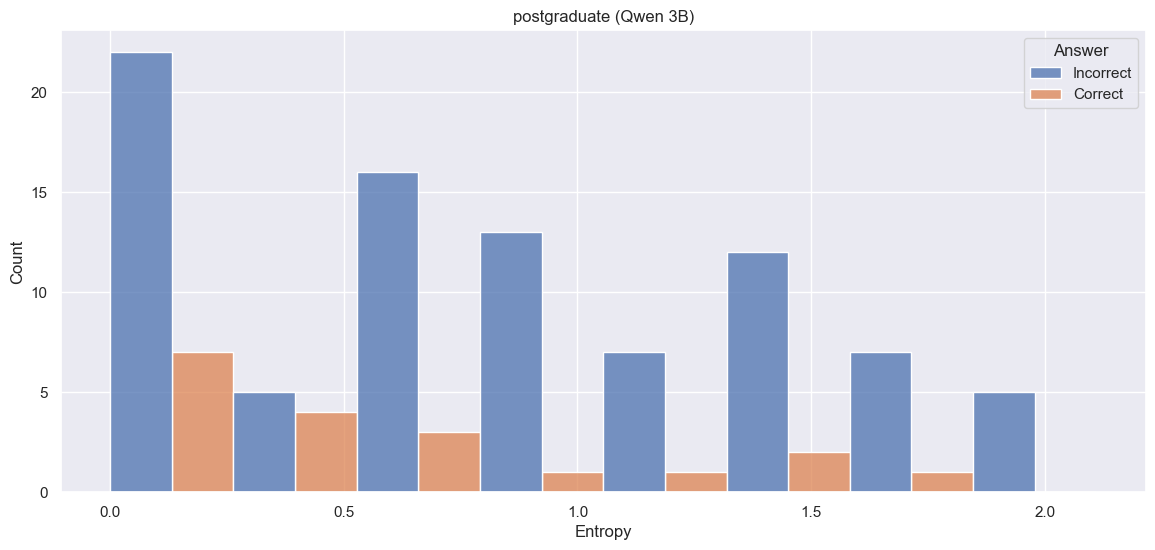

In [8]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_with_masj_edu_levels,
    "masj_complexity",
    "entropy_value_qwen2",
    "entropy_ans_correct_qwen2",
    model_name=model_title,
)

In [9]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_with_masj_edu_levels,
    category_col="masj_complexity",
    model_answer_correct_col="entropy_ans_correct_qwen2",
    score_col="entropy_value_qwen2",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.719331,0.438662,11559,0.330565,Qwen 3B,entropy_value_qwen2
1,graduate,0.657653,0.315305,2344,0.276877,Qwen 3B,entropy_value_qwen2
2,undergraduate,0.731172,0.462343,6731,0.344674,Qwen 3B,entropy_value_qwen2
3,high_school_and_easier,0.734370,0.468740,2378,0.350294,Qwen 3B,entropy_value_qwen2
4,postgraduate,0.633394,0.266788,106,0.179245,Qwen 3B,entropy_value_qwen2


In [10]:
from reasoning_fine_tune.analysis.join_with_masj_reasoning_score import join_with_masj_reasoning_score

mmlu_entropy_df_with_masj_reasoning = join_with_masj_reasoning_score(mmlu_entropy_df)

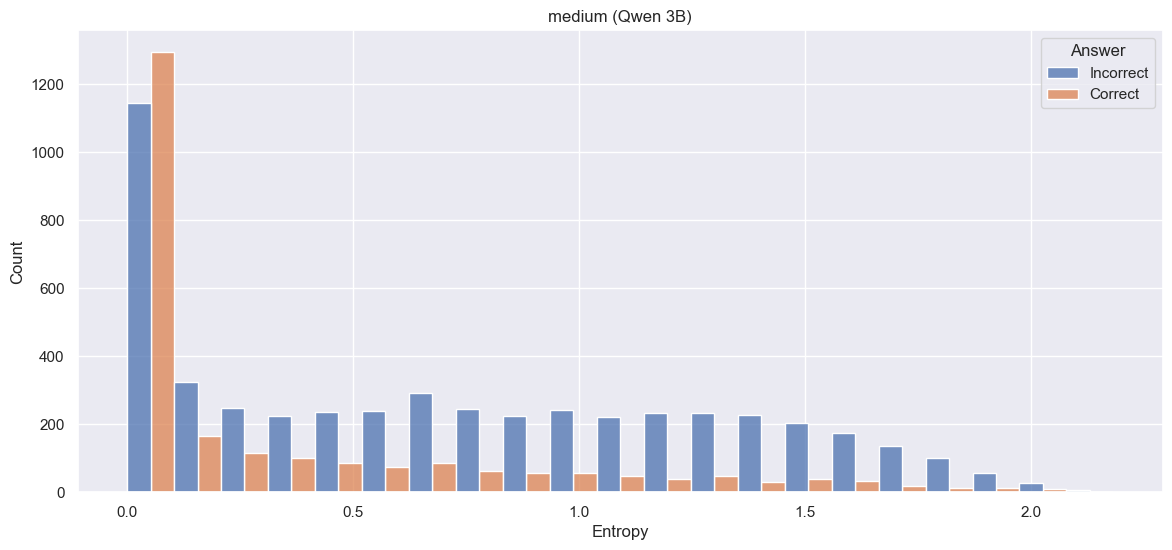

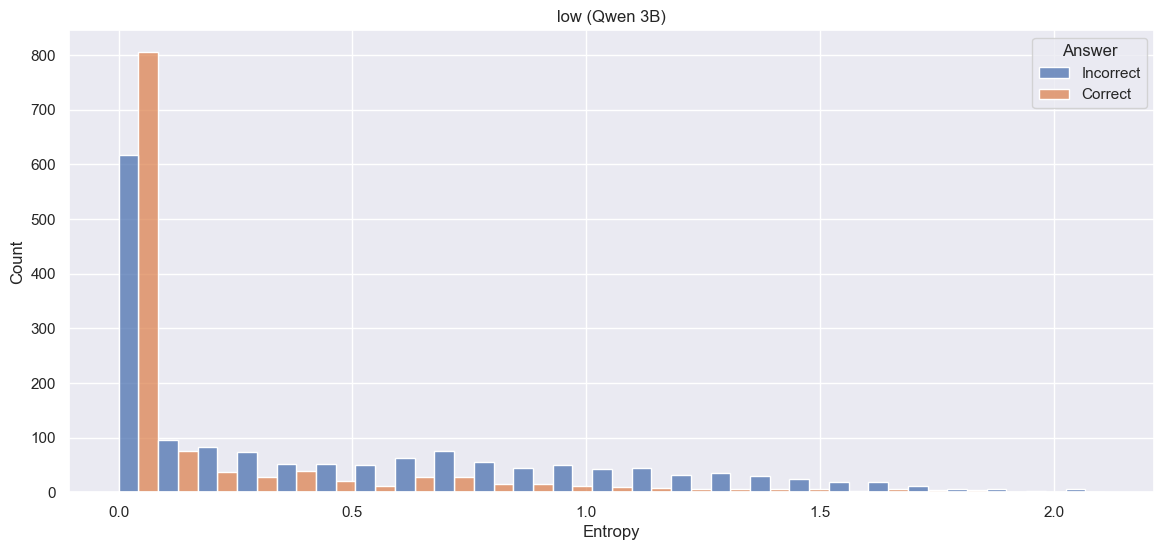

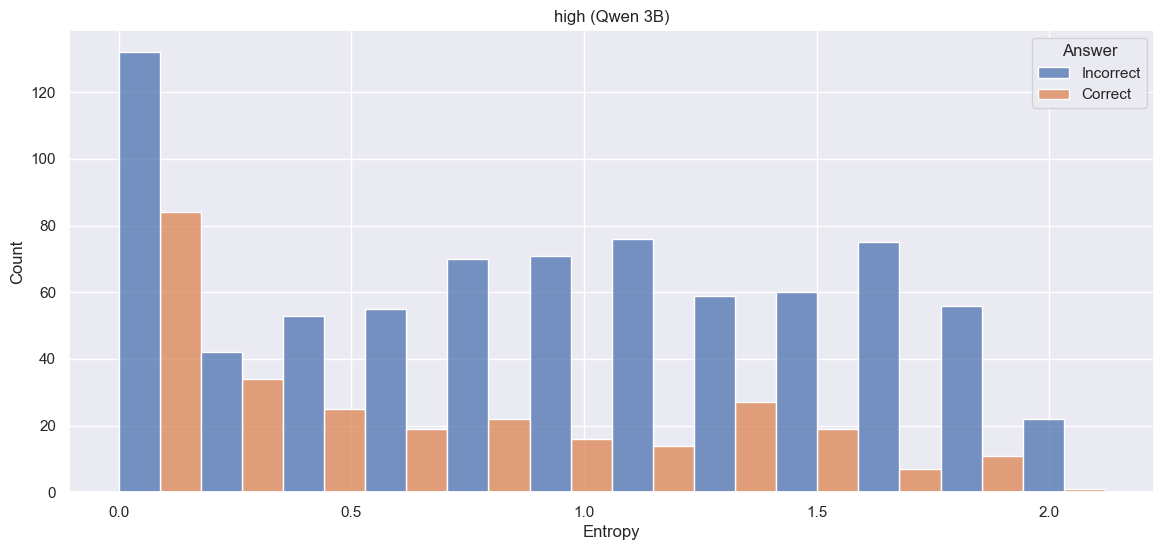

In [11]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_with_masj_reasoning,
    "masj_num_reasoning_steps",
    "entropy_value_qwen2",
    "entropy_ans_correct_qwen2",
    model_name=model_title,
)

In [12]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_with_masj_reasoning,
    category_col="masj_num_reasoning_steps",
    model_answer_correct_col="entropy_ans_correct_qwen2",
    score_col="entropy_value_qwen2",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.718747,0.437493,11222,0.341205,Qwen 3B,entropy_value_qwen2
1,medium,0.716640,0.433280,7424,0.321255,Qwen 3B,entropy_value_qwen2
2,low,0.719757,0.439515,2748,0.423945,Qwen 3B,entropy_value_qwen2
3,high,0.643767,0.287533,1050,0.265714,Qwen 3B,entropy_value_qwen2
